In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2025-2\S03_datasets\iris\iris.csv"
df = pd.read_csv(iris_path)

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

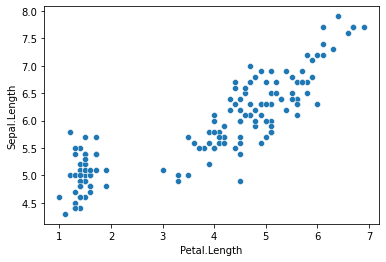

In [3]:
sns.scatterplot(data=df, x='Petal.Length', y='Sepal.Length')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
# Seleccionamos los datos de interés
X = df.iloc[:, :-1]

In [6]:
# Normalizamos data
X_std = StandardScaler().fit_transform(X)

### Creación de dataframe y plots

In [7]:
df_std = pd.DataFrame(data=X_std, columns=df.columns[:-1])

# Método del codo

In [8]:
inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Método del codo')

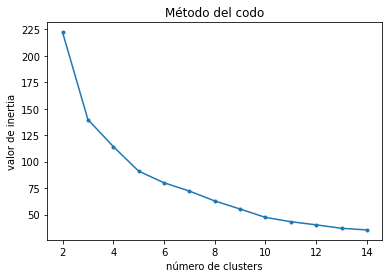

In [9]:
plt.plot(range(2, 15), inertia, '.-')

plt.xlabel('número de clusters')
plt.ylabel('valor de inertia')
plt.title('Método del codo')

### Si tenemos múltiples puntos de inflexión del codo
Hay que analizar

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

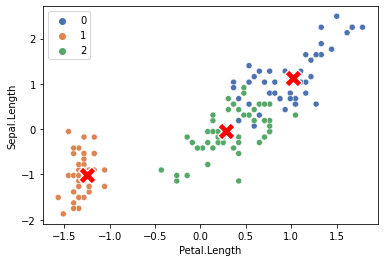

In [20]:
# Calculo kmeans
no_clusters = 3
kmeans = KMeans(n_clusters=no_clusters)
kmeans.fit(X_std)

# Construyo datafrae
df_std = pd.DataFrame(data=X_std, columns=df.columns[:-1])
df_std['kmeans'] = kmeans.labels_
clusters_df = kmeans.cluster_centers_

# Ploteo
sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', hue='kmeans', palette='deep')
sns.scatterplot(x=clusters_df[:, 3], y=clusters_df[:, 0], 
                marker="X", color='r', s=300)

# Iterando k-means

In [21]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [22]:
df2 = df.iloc[:, [0, 2]]
df2.head(2)

,Sepal.Length,Petal.Length
0,5.1,1.4
1,4.9,1.4


In [23]:
df2_std_np =  StandardScaler().fit_transform(df2)
df2_std_df = pd.DataFrame(data=df2_std_np, columns=df2.columns)

# Calculo kmeans
no_clusters = 3
kmeans = KMeans(n_clusters=no_clusters)
kmeans.fit(df2_std_np)
cluseters_df2 = kmeans.cluster_centers_

df2_std_df = pd.DataFrame(data=df2_std_np, columns=df2.columns)

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

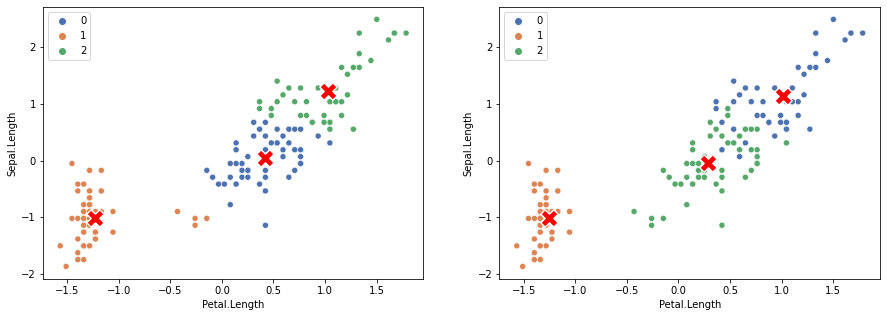

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=df2_std_df, y='Sepal.Length', x='Petal.Length', hue=kmeans.labels_, ax=axes[0], palette='deep')
sns.scatterplot(x=cluseters_df2[:, 1], y=cluseters_df2[:, 0], ax=axes[0],
                marker="X", color='r', s=300)

sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', hue='kmeans', ax=axes[1], palette='deep')
sns.scatterplot(x=clusters_df[:, 3], y=clusters_df[:, 0], ax=axes[1],
                marker="X", color='r', s=300)

In [15]:
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


3 [[ 0.57100359  0.69111943]
 [-1.64115149 -1.39706395]
 [-0.88991069 -1.19497532]]
6 [[ 0.64488233  0.73433956]
 [-1.42170301 -1.33170091]
 [-0.74013374 -0.98641354]]
9 [[ 0.74099571  0.78563187]
 [-1.1834062  -1.30816439]
 [-0.50375194 -0.46218628]]
12 [[ 0.98719242  0.89660124]
 [-1.01457897 -1.30498732]
 [-0.27571005  0.25421287]]
15 [[ 1.14680856  0.98662813]
 [-1.01499048 -1.24907216]
 [-0.04998175  0.37200096]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


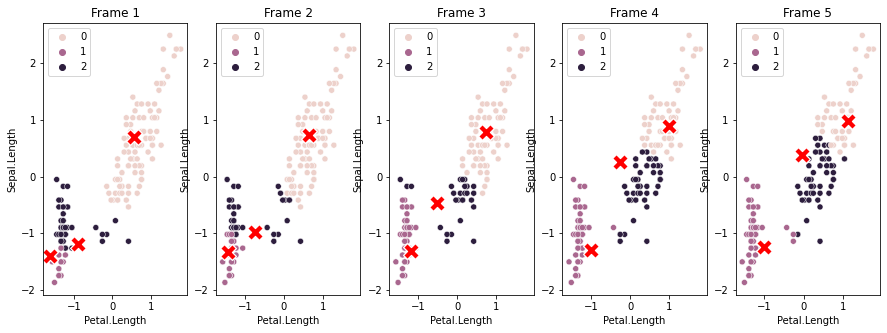

In [17]:
df2_std_np =  StandardScaler().fit_transform(df2)
df2_std_df = pd.DataFrame(data=df2_std_np, columns=df2.columns)

seeds = np.array([[2, 0], [2, 0], [2, 0]])

frames = 5
fig, axes = plt.subplots(1, frames, figsize=(15, 5))

for idx in range(1, frames+1):
    kmeans = KMeans(n_clusters=3, max_iter=3*idx, init=seeds)
    kmeans.fit(df2_std_np)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    print(kmeans.n_iter_, cluster_centers)
    
    sns.scatterplot(data=df2_std_df, x='Petal.Length', y='Sepal.Length', 
                    hue=labels, ax=axes[idx-1]).set_title(f"Frame {idx}")
    sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], marker="X", 
                   s=250, color='r', ax=axes[idx-1])

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


df2_std_df['Species'] = df['Species']
sns.scatterplot(data=df2_std_df, y='Sepal.Length', x='Petal.Length', hue='Species', ax=axes[0])

sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', hue='kmeans', ax=axes[1])
sns.scatterplot(x=clusters_df[:, 3], y=clusters_df[:, 0], ax=axes[1],
                marker="X", color='r', s=300)

In [ ]:
df